In [ ]:
import numpy as np
import matplotlib.pyplot as plt

xs = np.linspace(-10,10, 1000)
sigmoid = [1/(1+np.exp(-x)) for x in xs]
tanh = [np.tanh(x) for x in xs]
relu = [np.maximum(0, x/5) for x in xs]

plt.figure(figsize=(12,8))
plt.plot(xs, tanh, label="tanh")
plt.plot(xs, sigmoid, label='sigmoid')
plt.plot(xs, relu, label='ReLU')
plt.legend()
plt.show()

In [1]:
import os

os.chdir('/Users/ash/Downloads/capstone_code/data/penn')

In [2]:
import pandas as pd
data = pd.read_csv('./processed_penn_data.csv', index_col=[0]).reset_index(drop=True)

# data.info()

In [ ]:
a = data.groupby(['action'])['file_id'].unique()
print(a)

In [ ]:
import numpy as np
for _ in a:
    n = []
    for file in _:
        n.append(data[data['file_id'] == file].shape[0])
    print(np.median(n))

In [ ]:
#Plotting some keypoints positions

c = ['strum_guitar', 'tennis_serve', 'jumping_jacks', 'pullup', 'squat']
to_plot = []
for cl in c:
    df = data[data['action'] == cl]
    n = np.random.choice(df['file_id'].unique())
    df = df[df['file_id'] == n]
    df = df[::2]
    to_plot.append(df.iloc[-6:])

In [ ]:
os.chdir("/Users/ash/Downloads/capstone_code")
module_path = os.path.abspath(os.path.join('..'))
import sys
if module_path not in sys.path:
    sys.path.append(module_path)
    
from visualization.plotting import plot_pose, plot_pose_visible
x = to_plot[0]
plot_pose_visible(x.iloc[0, 2:15], x.iloc[0, 15:28], list(x.iloc[0, 28:41]), x.iloc[0, -4], x.iloc[0, -3])

In [ ]:
def plot_pose_visible(xs, ys, vis, w, h):
    import matplotlib.pyplot as plt
    pairs = [[0,1], [0,2], [1, 3], [3, 5], [2, 4], [4, 6], [1, 7], [2,8], [7, 9], [9, 11], [8, 10], [10, 12], [7, 8]]
#     plt.figure(figsize=(12,8))
    ys = h - ys
    vis = list(vis)
#     print(vis)
    plt.scatter(xs[vis]/w, ys[vis]/h)
    for pair in pairs:
        vis_or_not = [vis[point] for point in pair]
        if all(vis_or_not):
            plt.plot(xs[pair]/w, ys[pair]/h, lw=5)
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xticks([])
    plt.yticks([])
    
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
for n in range(len(c)):
    x = to_plot[n]
    plt.subplot(5, 6, (n)*6+1)
    plot_pose_visible(x.iloc[0, 2:15], x.iloc[0, 15:28], list(x.iloc[0, 28:41]), x.iloc[0, -4], x.iloc[0, -3])
    plt.subplot(5, 6, (n)*6+2)
    plot_pose_visible(x.iloc[1, 2:15], x.iloc[1, 15:28], list(x.iloc[1, 28:41]), x.iloc[1, -4], x.iloc[1, -3])
    plt.subplot(5, 6, (n)*6+3)
    plot_pose_visible(x.iloc[2, 2:15], x.iloc[2, 15:28], list(x.iloc[2, 28:41]), x.iloc[2, -4], x.iloc[2, -3])
    plt.subplot(5, 6, (n)*6+4)
    plot_pose_visible(x.iloc[3, 2:15], x.iloc[3, 15:28], list(x.iloc[3, 28:41]), x.iloc[3, -4], x.iloc[3, -3])
    plt.subplot(5, 6, (n)*6+5)
    plot_pose_visible(x.iloc[4, 2:15], x.iloc[4, 15:28], list(x.iloc[4, 28:41]), x.iloc[4, -4], x.iloc[4, -3])
    plt.subplot(5, 6, (n)*6+6)
    plot_pose_visible(x.iloc[5, 2:15], x.iloc[5, 15:28], list(x.iloc[5, 28:41]), x.iloc[5, -4], x.iloc[5, -3])
    
plt.show()
    

In [10]:
new_d = data.sample(frac=0.2)

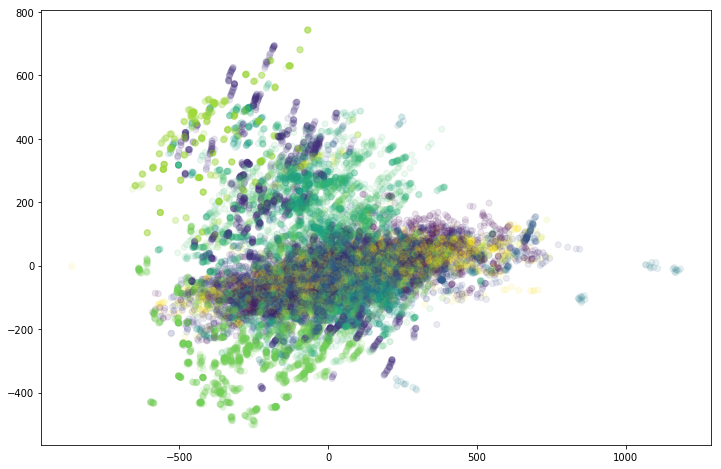

In [11]:
#PCA + t-SNE for all classes
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2)
new = pca.fit_transform(new_d.iloc[:,2:41])

from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()
label = en.fit_transform(new_d['action'])
plt.figure(figsize=(12,8))
plt.scatter(new[:,0], new[:,1], c=label, alpha=0.1)
plt.show()

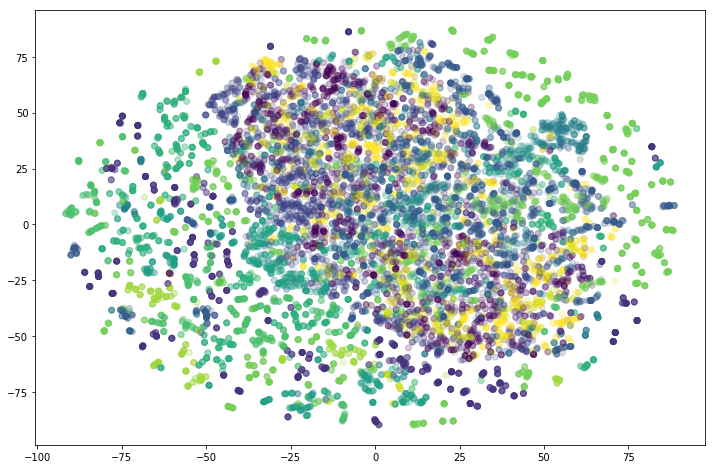

In [12]:
from sklearn.manifold import TSNE

sne = TSNE(n_components=2)
new = sne.fit_transform(new_d.iloc[:,2:41])

plt.figure(figsize=(12,8))
plt.scatter(new[:,0], new[:,1], c=label, alpha=0.1)
plt.show()

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding
em = LocallyLinearEmbedding(n_components=2, eigen_solver='dense')
new = em.fit_transform(new_d.iloc[:,2:41])

plt.figure(figsize=(12,8))
plt.scatter(new[:,0], new[:,1], c=label, alpha=0.1)
plt.show()

In [ ]:
import glob
import os
import matplotlib.pyplot as plt 
os.chdir("/users/ash/Downloads/goods")
files1 = glob.glob("./g1/*.png")
files2 = glob.glob("./g2/*.png")
plt.figure(figsize=(20, 10))
for _ in range(5):
    plt.subplot(2, 5, _+1)
    a = plt.imread(files1[_])
    plt.imshow(a, interpolation='nearest', aspect='auto')
    plt.title(str(_+1))
    plt.axis('off')
    
for _ in range(5):
    plt.subplot(2, 5, _+6)
    a = plt.imread(files2[_])
    plt.imshow(a, interpolation='nearest', aspect='auto')
    plt.title(str(_+1))
    plt.axis('off')
plt.show()

ModuleNotFoundError: No module named 'cv2'